# Telecom Service Customer Churn Prediction

## Dataset Preparation

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [420]:
df_combined = pd.read_csv('Telecom Churn Dataset.csv')

In [ ]:
df_train = df_combined[df_combined['customerID'] <= 4000]
df_test = df_combined[(df_combined['customerID'] >= 4001) & (df_combined['customerID'] <= 5000)]


In [ ]:
df_test.columns
df_train.columns

Index(['customerID', 'location', 'Account length', 'Area code', 'Phone number',
       'international plan', 'voice mail', 'No. of email messages',
       ' minutes of usage per day', 'calls made per day', 'Total day charge',
       'Total evening minutes of usage', 'Total evening calls',
       'Total evening charge', ' Total night minutes of usage',
       'Total night calls', 'Total night charge',
       'Total international minutes of usage', 'Total international calls',
       'Total international charge', 'Number of customer service calls',
       'label'],
      dtype='object')

In [ ]:
df_train.head(2)

,customerID,location,Account length,Area code,Phone number,international plan,voice mail,No. of email messages,minutes of usage per day,calls made per day,...,Total evening calls,Total evening charge,Total night minutes of usage,Total night calls,Total night charge,Total international minutes of usage,Total international calls,Total international charge,Number of customer service calls,label
0,1,KS,128,415,382-4657,no,yes,25,265.1,110,...,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False.
1,2,OH,107,415,371-7191,no,yes,26,161.6,123,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.


In [ ]:
df_train.loc[df_train['international plan']==' no',['international plan']] = 0
df_train.loc[df_train['international plan']==' yes',['international plan']] = 1
df_train.loc[df_train['voice mail']==' no',['voice mail']] = 0
df_train.loc[df_train['voice mail']==' yes',['voice mail']] = 1
df_train.loc[df_train['label']==' True.',['label']]=1
df_train.loc[df_train['label']==' False.',['label']]=0
df_train.head(2)

,customerID,location,Account length,Area code,Phone number,international plan,voice mail,No. of email messages,minutes of usage per day,calls made per day,...,Total evening calls,Total evening charge,Total night minutes of usage,Total night calls,Total night charge,Total international minutes of usage,Total international calls,Total international charge,Number of customer service calls,label
0,1,KS,128,415,382-4657,0,1,25,265.1,110,...,99,16.78,244.7,91,11.01,10.0,3,2.7,1,0
1,2,OH,107,415,371-7191,0,1,26,161.6,123,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,0


In [ ]:
df_test.loc[df_test['international plan']==' no',['international plan']] = 0
df_test.loc[df_test['international plan']==' yes',['international plan']] = 1
df_test.loc[df_test['voice mail']==' no',['voice mail']] = 0
df_test.loc[df_test['voice mail']==' yes',['voice mail']] = 1
df_test.loc[df_test['label']==' True.',['label']]=1
df_test.loc[df_test['label']==' False.',['label']]=0
df_test.head(2)

,customerID,location,Account length,Area code,Phone number,international plan,voice mail,No. of email messages,minutes of usage per day,calls made per day,...,Total evening calls,Total evening charge,Total night minutes of usage,Total night calls,Total night charge,Total international minutes of usage,Total international calls,Total international charge,Number of customer service calls,label
4000,4001,IL,119,408,363-8175,0,0,0,197.2,111,...,78,14.29,209.8,84,9.44,4.2,2,1.13,1,0
4001,4002,WA,54,415,414-8688,0,1,28,217.4,98,...,120,20.93,127.0,92,5.72,7.5,8,2.03,1,0


In [ ]:
df_train.drop('location',axis=1,inplace=True)
df_train.drop('Phone number',axis=1,inplace=True)

In [ ]:
df_test.drop('location',axis=1,inplace=True)
df_test.drop('Phone number',axis=1,inplace=True)

In [ ]:
df_train.columns

Index(['customerID', 'Account length', 'Area code', 'international plan',
       'voice mail', 'No. of email messages', ' minutes of usage per day',
       'calls made per day', 'Total day charge',
       'Total evening minutes of usage', 'Total evening calls',
       'Total evening charge', ' Total night minutes of usage',
       'Total night calls', 'Total night charge',
       'Total international minutes of usage', 'Total international calls',
       'Total international charge', 'Number of customer service calls',
       'label'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_train['international plan'] = label_encoder.fit_transform(df_train['international plan'])
df_train['voice mail'] = label_encoder.fit_transform(df_train['voice mail'])
df_train['label'] = df_train['label'].replace({' True.': 1, ' False.': 0})

# Use transform for the test data
df_test['international plan'] = label_encoder.transform(df_test['international plan'])
df_test['voice mail'] = label_encoder.transform(df_test['voice mail'])
df_test['label'] = df_test['label'].replace({' True.': 1, ' False.': 0})

# Verify data types after the transformations
print(df_train.dtypes)
print(df_test.dtypes)


customerID                                int64
Account length                            int64
Area code                                 int64
international plan                        int64
voice mail                                int64
No. of email messages                     int64
 minutes of usage per day               float64
calls made per day                        int64
Total day charge                        float64
Total evening minutes of usage          float64
Total evening calls                       int64
Total evening charge                    float64
 Total night minutes of usage           float64
Total night calls                         int64
Total night charge                      float64
Total international minutes of usage    float64
Total international calls                 int64
Total international charge              float64
Number of customer service calls          int64
label                                     int64
dtype: object
customerID                

In [ ]:
X_train = df_train.iloc[:,:-1]
y_train = df_train.iloc[:,-1]
X_test = df_test.iloc[:,:-1]
y_test = df_test.iloc[:,-1]

## Exploratory Data Analysis

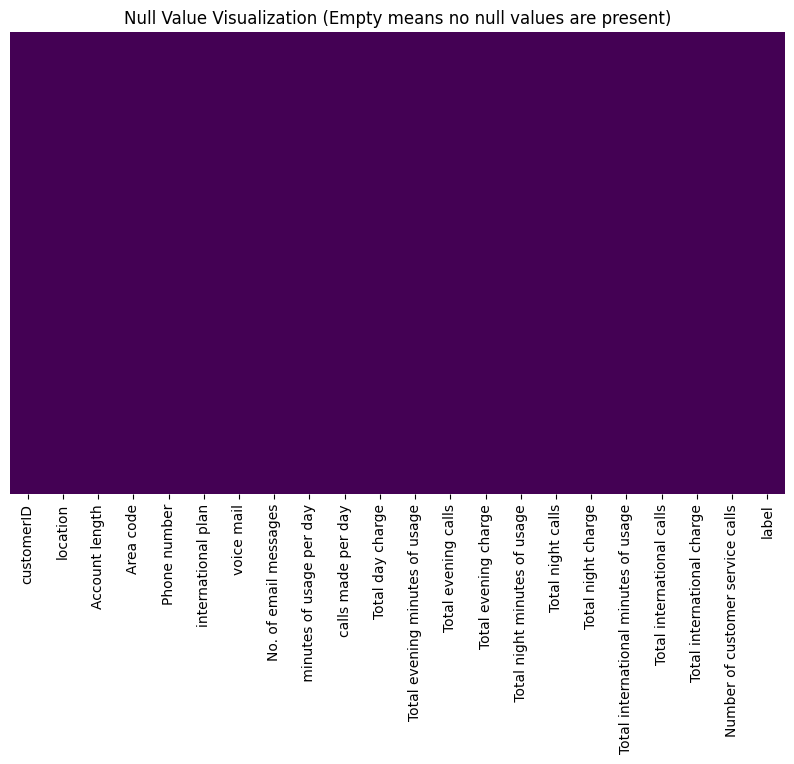

In [494]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a heatmap to visualize null values
plt.figure(figsize=(10, 6))
sns.heatmap(df_combined.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Null Value Visualization (Empty means no null values are present)")
plt.show()


In [488]:
df_train.columns

Index(['customerID', 'Account length', 'Area code', 'international plan',
       'voice mail', 'No. of email messages', ' minutes of usage per day',
       'calls made per day', 'Total day charge',
       'Total evening minutes of usage', 'Total evening calls',
       'Total evening charge', ' Total night minutes of usage',
       'Total night calls', 'Total night charge',
       'Total international minutes of usage', 'Total international calls',
       'Total international charge', 'Number of customer service calls',
       'label'],
      dtype='object')

<Axes: >

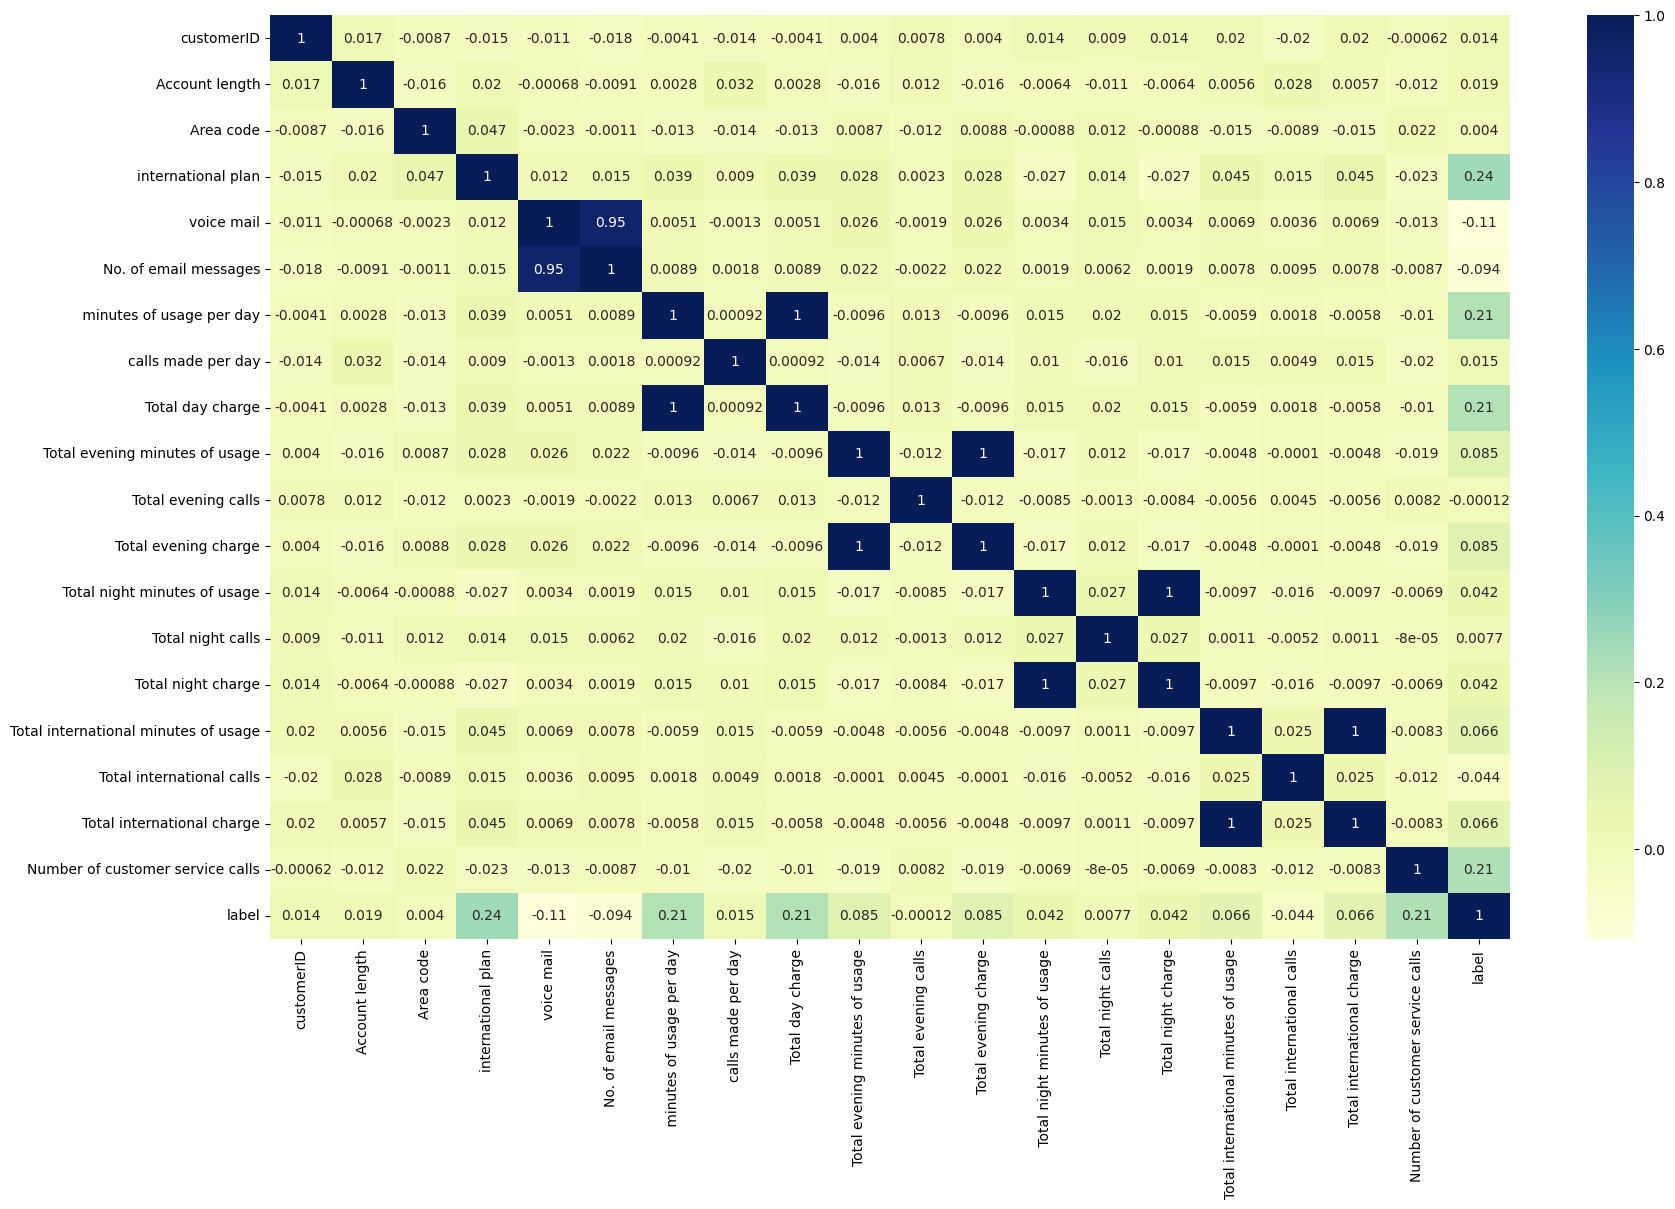

In [ ]:
f, axes = plt.subplots(figsize=(20, 12))

cor = df_train.corr()
sns.heatmap(cor,annot=True,cmap = 'YlGnBu')

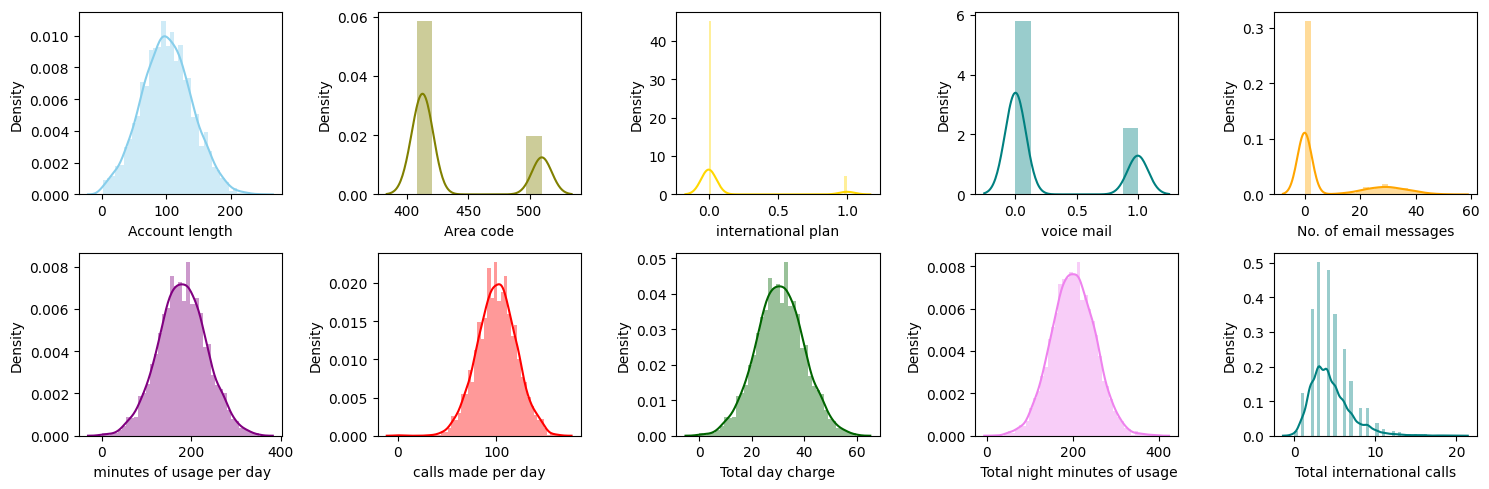

In [ ]:
#plotting
f, axes = plt.subplots(2, 5, figsize=(15, 5))
sns.distplot( df_train["Account length"] , color="skyblue", ax=axes[0, 0])
sns.distplot( df_train["Area code"] , color="olive", ax=axes[0, 1])
sns.distplot( df_train["international plan"] , color="gold", ax=axes[0, 2])
sns.distplot( df_train["voice mail"] , color="teal", ax=axes[0, 3])
sns.distplot( df_train["No. of email messages"] , color="orange", ax=axes[0, 4])
sns.distplot( df_train[" minutes of usage per day"] , color="purple", ax=axes[1, 0])
sns.distplot( df_train["calls made per day"] , color="red",ax=axes[1, 1])
sns.distplot( df_train["Total day charge"] , color="darkgreen", ax=axes[1, 2])
sns.distplot( df_train[" Total night minutes of usage"] , color="violet", ax=axes[1, 3])
sns.distplot( df_train["Total international calls"] , color="teal", ax=axes[1, 4])
f.tight_layout()
plt.show()

## Machine Learning Models

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression(max_iter=100)


In [ ]:
print(pd.unique(y_train))


[0 1]


In [ ]:
logreg.fit(X_train, y_train)
prediction_log = logreg.predict(X_test)

In [430]:
from sklearn.metrics import classification_report

logreg_accuracy = logreg.score(X_test, y_test) * 100
print('Accuracy of logistic regression: ', logreg_accuracy)

# Calculate precision, recall, and F1-score without support column for Logistic Regression
logreg_report = classification_report(y_test, prediction_log, output_dict=True)
for label, metrics in logreg_report.items():
    if label.isdigit():
        print(f"Class {label}:")
        print(f"Precision: {metrics['precision']:.2f}")
        print(f"Recall: {metrics['recall']:.2f}")
        print(f"F1-Score: {metrics['f1-score']:.2f}")
        print(f"")

# Overall metrics for Logistic Regression
overall_logreg = logreg_report['weighted avg']
print("Overall Metrics for Logistic Regression:")
print(f"Overall Precision: {overall_logreg['precision']:.2f}")
print(f"Overall Recall: {overall_logreg['recall']:.2f}")
print(f"Overall F1-Score: {overall_logreg['f1-score']:.2f}")


Accuracy of logistic regression:  86.0
Class 0:
Precision: 0.86
Recall: 1.00
F1-Score: 0.92

Class 1:
Precision: 1.00
Recall: 0.01
F1-Score: 0.01

Overall Metrics for Logistic Regression:
Overall Precision: 0.88
Overall Recall: 0.86
Overall F1-Score: 0.80


### Grid Search CV on Logistic Regression

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'C' : np.logspace(0,4,10),
    'penalty': ['l1','l2']
}


best_model_cv = GridSearchCV(estimator=logreg, param_grid=param_grid, cv= 10)
best_model_cv.fit(X_train, y_train)
best_model_cv.best_estimator_

LogisticRegression(C=464.15888336127773)

In [ ]:
logreg_cv =LogisticRegression(C=21.544346900318832, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='auto', n_jobs=None, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [ ]:
logreg_cv.fit(X_train,y_train)


LogisticRegression(C=21.544346900318832)

In [431]:
from sklearn.metrics import classification_report

prediction_log_cv = logreg_cv.predict(X_test)
logreg_cv_accuracy = logreg_cv.score(X_test, y_test) * 100
print('Accuracy of Grid Search CV Logistic Regression: ', logreg_cv_accuracy)

# Calculate precision, recall, and F1-score without support column for Grid Search CV Logistic Regression
logreg_cv_report = classification_report(y_test, prediction_log_cv, output_dict=True)
for label, metrics in logreg_cv_report.items():
    if label.isdigit():
        print(f"Class {label}:")
        print(f"Precision: {metrics['precision']:.2f}")
        print(f"Recall: {metrics['recall']:.2f}")
        print(f"F1-Score: {metrics['f1-score']:.2f}")
        print(f"")

# Overall metrics for Grid Search CV Logistic Regression
overall_logreg_cv = logreg_cv_report['weighted avg']
print("Overall Metrics for Grid Search CV Logistic Regression:")
print(f"Overall Precision: {overall_logreg_cv['precision']:.2f}")
print(f"Overall Recall: {overall_logreg_cv['recall']:.2f}")
print(f"Overall F1-Score: {overall_logreg_cv['f1-score']:.2f}")


Accuracy of Grid Search CV Logistic Regression:  86.1
Class 0:
Precision: 0.86
Recall: 1.00
F1-Score: 0.93

Class 1:
Precision: 1.00
Recall: 0.01
F1-Score: 0.03

Overall Metrics for Grid Search CV Logistic Regression:
Overall Precision: 0.88
Overall Recall: 0.86
Overall F1-Score: 0.80


## Support Vector Machine(SVM)

In [433]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
pred_svm=svm.predict(X_test)

In [434]:
from sklearn.metrics import classification_report

svm.fit(X_train, y_train)
pred_svm = svm.predict(X_test)
svm_accuracy = svm.score(X_test, y_test) * 100
print('SVM Accuracy: ', svm_accuracy)

# Calculate precision, recall, and F1-score without support column for SVM
svm_report = classification_report(y_test, pred_svm, output_dict=True)
for label, metrics in svm_report.items():
    if label.isdigit():
        print(f"Class {label}:")
        print(f"Precision: {metrics['precision']:.2f}")
        print(f"Recall: {metrics['recall']:.2f}")
        print(f"F1-Score: {metrics['f1-score']:.2f}")
        print(f"")

# Overall metrics for SVM
overall_svm = svm_report['weighted avg']
print("Overall Metrics for SVM:")
print(f"Overall Precision: {overall_svm['precision']:.2f}")
print(f"Overall Recall: {overall_svm['recall']:.2f}")
print(f"Overall F1-Score: {overall_svm['f1-score']:.2f}")

SVM Accuracy:  85.9
Class 0:
Precision: 0.86
Recall: 1.00
F1-Score: 0.92

Class 1:
Precision: 0.00
Recall: 0.00
F1-Score: 0.00

Overall Metrics for SVM:
Overall Precision: 0.74
Overall Recall: 0.86
Overall F1-Score: 0.79


### GridSearch CV on SVM

In [ ]:
param_grid = {
    'gamma': [0.001, 0.01, 0.1]
}

best_svm_cv = GridSearchCV(estimator=svm, param_grid=param_grid, cv= 5)
best_svm_cv.fit(X_train, y_train)
best_svm_cv.best_estimator_

SVC(gamma=0.001)

In [ ]:
svm_cv = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [ ]:
svm_cv.fit(X_train,y_train)

SVC(gamma=0.001)

In [437]:
from sklearn.metrics import classification_report

# Assuming svm_cv is your GridSearchCV instance for SVM
svm_cv.fit(X_train, y_train)
pred_svm_cv = svm_cv.predict(X_test)
svm_cv_accuracy = svm_cv.score(X_test, y_test) * 100
print('SVM CV Accuracy: ', svm_cv_accuracy)

# Calculate precision, recall, and F1-score without support column for SVM CV
svm_cv_report = classification_report(y_test, pred_svm_cv, output_dict=True)
for label, metrics in svm_cv_report.items():
    if label.isdigit():
        print(f"Class {label}:")
        print(f"Precision: {metrics['precision']:.2f}")
        print(f"Recall: {metrics['recall']:.2f}")
        print(f"F1-Score: {metrics['f1-score']:.2f}")
        print(f"")

# Overall metrics for SVM CV
overall_svm_cv = svm_cv_report['weighted avg']
print("Overall Metrics for SVM CV:")
print(f"Overall Precision: {overall_svm_cv['precision']:.2f}")
print(f"Overall Recall: {overall_svm_cv['recall']:.2f}")
print(f"Overall F1-Score: {overall_svm_cv['f1-score']:.2f}")


SVM CV Accuracy:  85.9
Class 0:
Precision: 0.86
Recall: 1.00
F1-Score: 0.92

Class 1:
Precision: 0.00
Recall: 0.00
F1-Score: 0.00

Overall Metrics for SVM CV:
Overall Precision: 0.74
Overall Recall: 0.86
Overall F1-Score: 0.79


## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RFC = RandomForestClassifier()

In [429]:
from sklearn.metrics import classification_report

RFC.fit(X_train, y_train)
pred_rfc = RFC.predict(X_test)
RFC_accuracy = RFC.score(X_test, y_test) * 100
print('RFC Accuracy: ', RFC_accuracy)

# Calculate precision, recall, and F1-score without support column
rfc_report = classification_report(y_test, pred_rfc, output_dict=True)
for label, metrics in rfc_report.items():
    if label.isdigit():
        print(f"Class {label}:")
        print(f"Precision: {metrics['precision']:.2f}")
        print(f"Recall: {metrics['recall']:.2f}")
        print(f"F1-Score: {metrics['f1-score']:.2f}")
        print(f"")

# Overall metrics
overall_rfc = rfc_report['weighted avg']
print("Overall Metrics of RFC:")
print(f"Overall RFC Precision: {overall_rfc['precision']:.2f}")
print(f"Overall RFC Recall: {overall_rfc['recall']:.2f}")
print(f"Overall RFC F1-Score: {overall_rfc['f1-score']:.2f}")


RFC Accuracy:  96.39999999999999
Class 0:
Precision: 0.96
Recall: 1.00
F1-Score: 0.98

Class 1:
Precision: 0.98
Recall: 0.76
F1-Score: 0.86

Overall Metrics of RFC:
Overall RFC Precision: 0.96
Overall RFC Recall: 0.96
Overall RFC F1-Score: 0.96


### GridSearch CV on Random Forest Classifier

In [484]:
param_grid = {
    'n_estimators': [2,3,4]
}


best_rfc_cv = GridSearchCV(estimator=RFC, param_grid=param_grid, cv= 5)
best_rfc_cv.fit(X_train, y_train)
print (best_rfc_cv.best_params_)

{'n_estimators': 4}


In [ ]:
rfc_cv = RandomForestClassifier(n_estimators = 4,random_state=60)

In [ ]:
rfc_cv.fit(X_train,y_train)

RandomForestClassifier(n_estimators=4, random_state=60)

In [428]:
from sklearn.metrics import classification_report

pred_rfc_cv = rfc_cv.predict(X_test)
rfc_cv_accuracy = rfc_cv.score(X_test, y_test) * 100
print('RFC accuracy: ', rfc_cv_accuracy)

# Calculate precision, recall, and F1-score without support column for GridSearchCV RFC
rfc_cv_report = classification_report(y_test, pred_rfc_cv, output_dict=True)
for label, metrics in rfc_cv_report.items():
    if label.isdigit():
        print(f"Class {label}:")
        print(f"Precision: {metrics['precision']:.2f}")
        print(f"Recall: {metrics['recall']:.2f}")
        print(f"F1-Score: {metrics['f1-score']:.2f}")
        print(f"")

# Overall metrics for GridSearchCV RFC
overall_rfc_cv = rfc_cv_report['weighted avg']
print("Overall Metrics for GridSearchCV RFC:")
print(f"Overall RFC Precision: {overall_rfc_cv['precision']:.2f}")
print(f"Overall RFC Recall: {overall_rfc_cv['recall']:.2f}")
print(f"Overall RFC F1-Score: {overall_rfc_cv['f1-score']:.2f}")


RFC accuracy:  93.8
Class 0:
Precision: 0.94
Recall: 0.99
F1-Score: 0.96

Class 1:
Precision: 0.92
Recall: 0.62
F1-Score: 0.74

Overall Metrics for GridSearchCV RFC:
Overall RFC Precision: 0.94
Overall RFC Recall: 0.94
Overall RFC F1-Score: 0.93


## Evaluating Model Performance

In [ ]:
from sklearn.metrics import confusion_matrix

### Logistic Regression Confusion Matrix

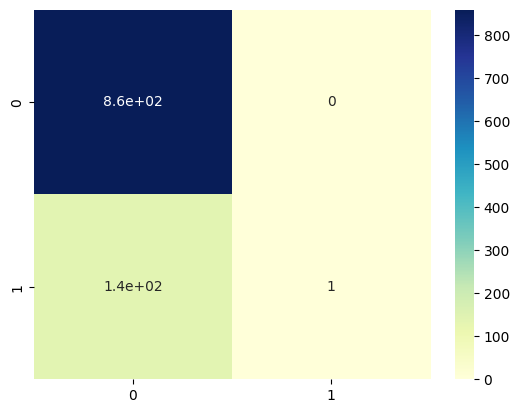

In [ ]:
cm_log = confusion_matrix(y_test, prediction_log)
cm_log
sns.heatmap(cm_log, annot = True, cmap = 'YlGnBu')
plt.show()

### GridSearchCV Logistic Regression Confusion Matrix

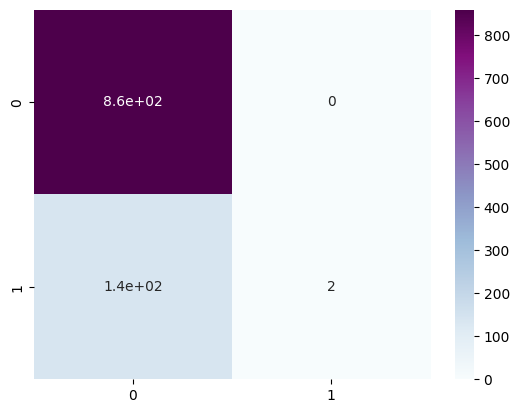

In [ ]:
cm_log_cv = confusion_matrix(y_test, prediction_log_cv)
cm_log_cv
sns.heatmap(cm_log_cv, annot = True, cmap = 'BuPu')
plt.show()

### SVM Confusion Matrix

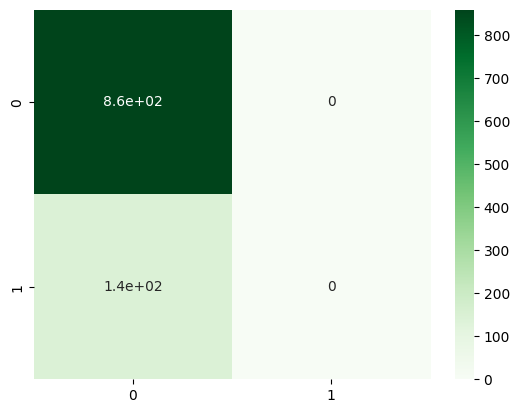

In [ ]:
cm_svm = confusion_matrix(y_test, pred_svm)
cm_svm
sns.heatmap(cm_svm, annot = True, cmap = 'Greens')
plt.show()

### GridSearchCV SVM Confusion Matrix

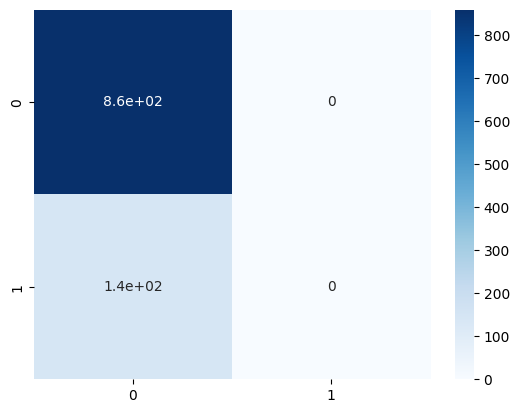

In [ ]:
cm_svm_cv = confusion_matrix(y_test, pred_svm_cv)
cm_svm_cv
sns.heatmap(cm_svm_cv, annot = True, cmap = 'Blues')
plt.show()

### Random Forest Classifer Confusion Matrix

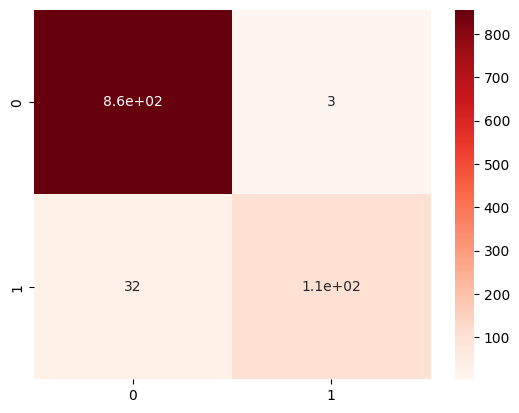

In [ ]:
cm_rf = confusion_matrix(y_test, pred_rfc)
cm_rf
sns.heatmap(cm_rf, annot = True, cmap = 'Reds')
plt.show()

### GridSearchCV Random Forest Classifier Confusion Matrix

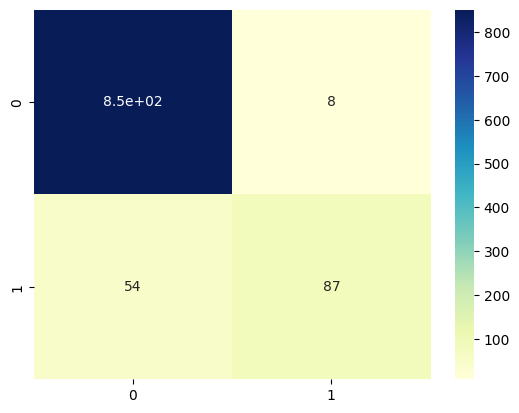

In [ ]:
cm_rf_cv = confusion_matrix(y_test, pred_rfc_cv)
cm_rf_cv
sns.heatmap(cm_rf_cv, annot = True, cmap = 'YlGnBu')
plt.show()

### Comparing accuracy of all the models

In [ ]:
accuracy = [logreg_accuracy,logreg_cv_accuracy,svm_accuracy,svm_cv_accuracy,RFC_accuracy,rfc_cv_accuracy]
model_names = ['Logistic Reg','GridSearchCV Logistic Reg','SVM','GridSearchCV SVM','RFC','GridSearchCV RFC']

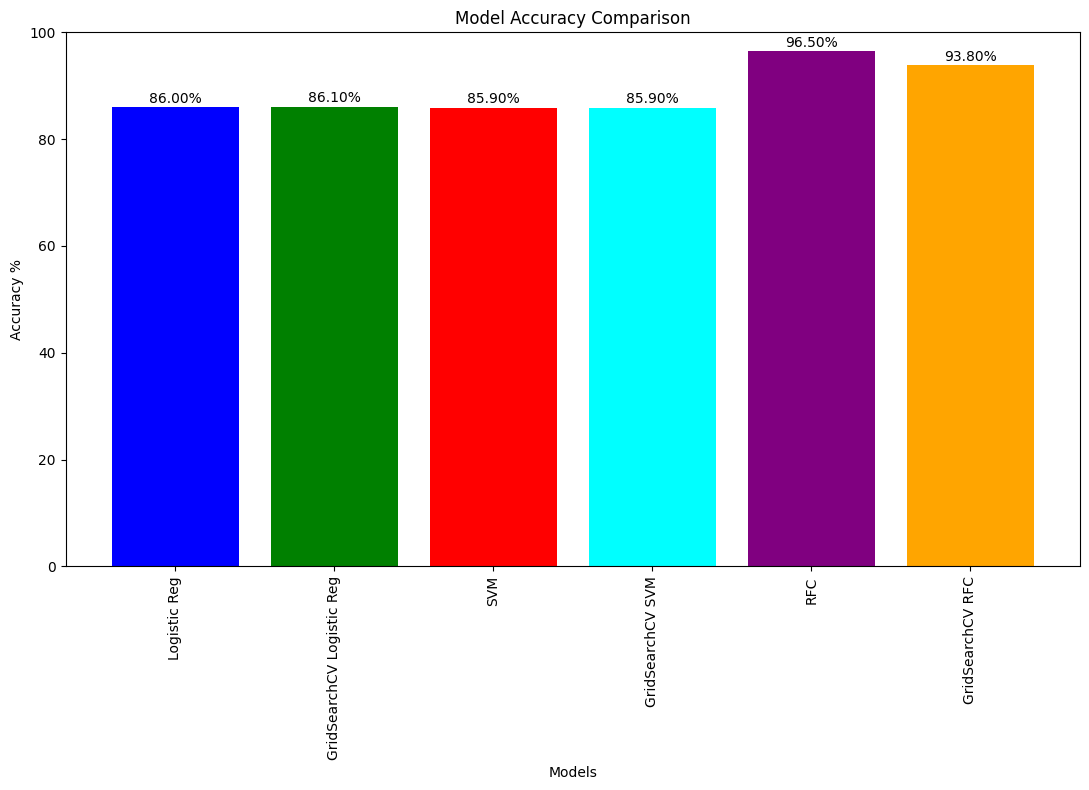

In [ ]:
accuracy = [logreg_accuracy, logreg_cv_accuracy, svm_accuracy, svm_cv_accuracy, RFC_accuracy, rfc_cv_accuracy]
model_names = ['Logistic Reg', 'GridSearchCV Logistic Reg', 'SVM', 'GridSearchCV SVM', 'RFC', 'GridSearchCV RFC']
plt.figure(figsize=(11, 8))
bars = plt.bar(model_names, accuracy, color=['blue', 'green', 'red', 'cyan', 'purple', 'orange'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy %')
plt.ylim(0.0, 100)
plt.xticks(rotation=90)
plt.tight_layout()

for bar, acc in zip(bars, accuracy):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.8, f'{acc:.2f}%', ha='center', color='black')

plt.show()

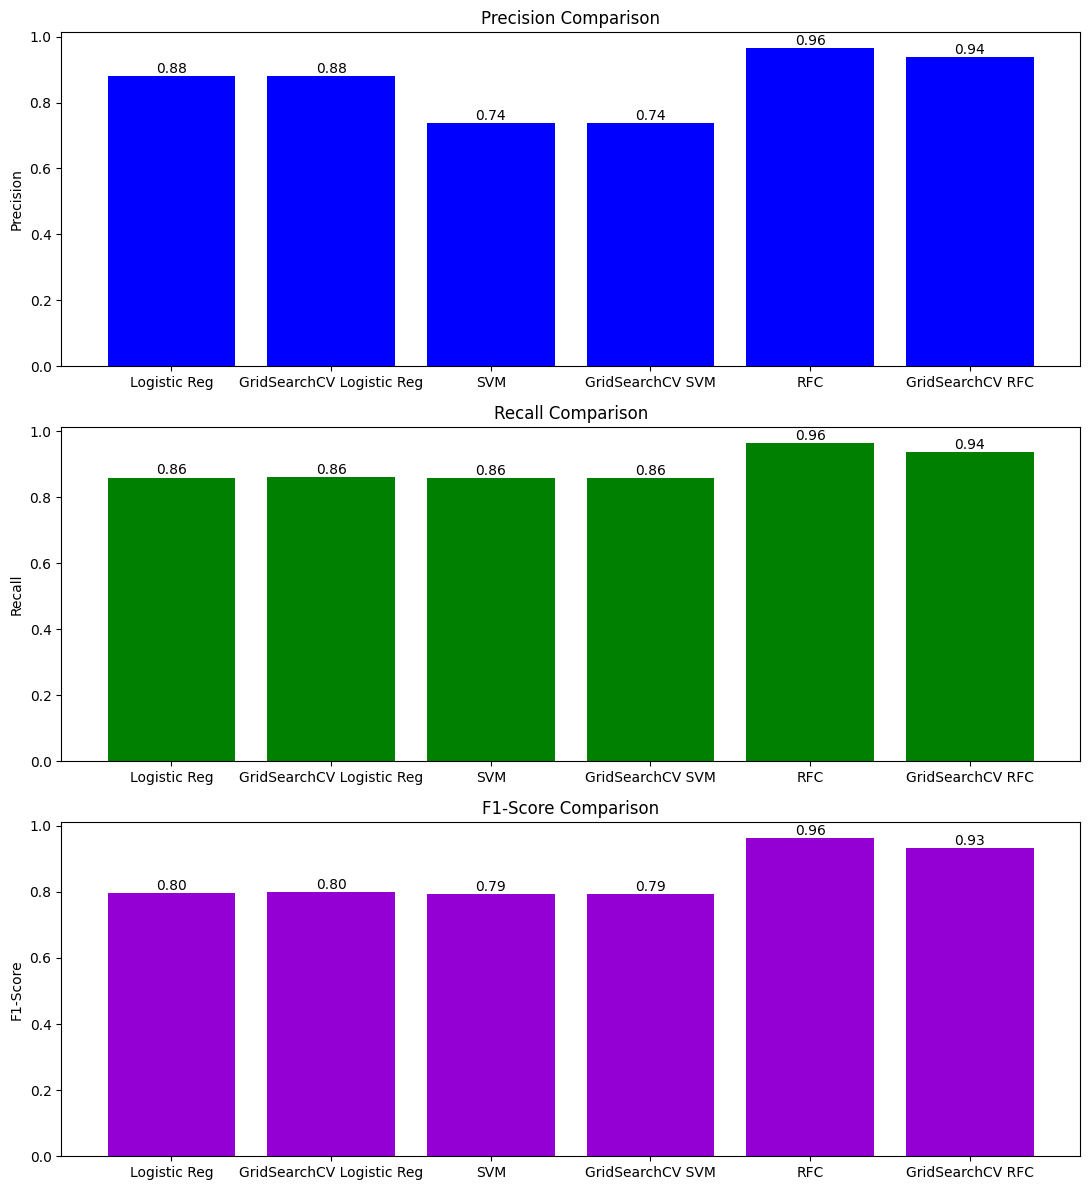

In [481]:
# Overall metrics for different models
metrics = [
    {'model': 'Logistic Reg', 'precision': overall_logreg['precision'], 'recall': overall_logreg['recall'], 'f1_score': overall_logreg['f1-score']},
    {'model': 'GridSearchCV Logistic Reg', 'precision': overall_logreg_cv['precision'], 'recall': overall_logreg_cv['recall'], 'f1_score': overall_logreg_cv['f1-score']},
    {'model': 'SVM', 'precision': overall_svm['precision'], 'recall': overall_svm['recall'], 'f1_score': overall_svm['f1-score']},
    {'model': 'GridSearchCV SVM', 'precision': overall_svm_cv['precision'], 'recall': overall_svm_cv['recall'], 'f1_score': overall_svm_cv['f1-score']},
    {'model': 'RFC', 'precision': overall_rfc['precision'], 'recall': overall_rfc['recall'], 'f1_score': overall_rfc['f1-score']},
    {'model': 'GridSearchCV RFC', 'precision': overall_rfc_cv['precision'], 'recall': overall_rfc_cv['recall'], 'f1_score': overall_rfc_cv['f1-score']}
]

model_names = [metric['model'] for metric in metrics]
precision_scores = [metric['precision'] for metric in metrics]
recall_scores = [metric['recall'] for metric in metrics]
f1_scores = [metric['f1_score'] for metric in metrics]

plt.figure(figsize=(11, 12))

plt.subplot(3, 1, 1)
bars = plt.bar(model_names, precision_scores, color='blue')
plt.title('Precision Comparison')
plt.ylabel('Precision')

for bar, precision in zip(bars, precision_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{precision:.2f}', ha='center', color='black')

plt.subplot(3, 1, 2)
bars = plt.bar(model_names, recall_scores, color='green')
plt.title('Recall Comparison')
plt.ylabel('Recall')

for bar, recall in zip(bars, recall_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{recall:.2f}', ha='center', color='black')

plt.subplot(3, 1, 3)
bars = plt.bar(model_names, f1_scores, color='darkviolet')
plt.title('F1-Score Comparison')
plt.ylabel('F1-Score')

for bar, f1 in zip(bars, f1_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{f1:.2f}', ha='center', color='black')

plt.tight_layout()
plt.show()


## Observations:
1) In all comparisons like accuracy, precision, recall and F1 scores, **RFC** turned out to be the best out of all of the used models. \
2) Looking at the precision, recall and f1 scores on class 1 (i.e customers churning) we can see that Logistic Regression and SVM performs horrendously. \
3) Having more attributes will enable the models to perform better.

